In [32]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

In [33]:
with h5py.File('/home/jovyan/LLC_uniform_test_PSD_spectra.h5', 'r') as f: 
    spectra = f['spectra'][()]
    wavenumbers = f['wavenumbers'][()]
    slopes = f['slopes'][()]
    intercepts = f['intercepts'][()]

In [34]:
spectra.shape

(781662, 2, 32)

In [35]:
wavenumbers.shape

(781662, 32)

In [36]:
slopes.shape

(781662, 4)

In [37]:
intercepts.shape

(781662, 4)

#### Look at first cutout

In [38]:
with h5py.File('/home/jovyan/LLC_uniform_test_preproc.h5', 'r') as g:
    img = g['valid'][0, 0, ...]
    mdat = g['valid_metadata'][0, :]

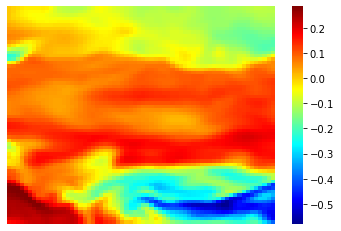

In [39]:
_, cm = ulmo_plotting.load_palette()

g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm)

##### Grab info

In [40]:
zonal_spectrum = spectra[0, 0, ...]
merid_spectrum = spectra[0, 1, ...]

freq = wavenumbers[0, ...]
zsmall_slope = slopes[0, 0]
msmall_slope = slopes[0, 2]
zlarge_slope = slopes[0, 1]
mlarge_slope = slopes[0, 3]

zsmall_int = intercepts[0, 0]
msmall_int = intercepts[0, 2]
zlarge_int = intercepts[0, 1]
mlarge_int = intercepts[0, 3]


##### Mean Power Spectrum, zonal

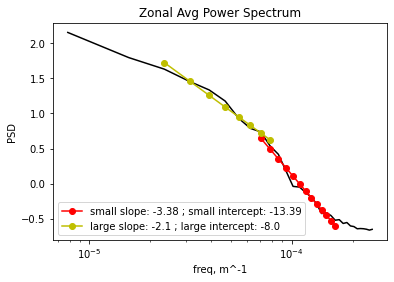

In [41]:
# plot the mean power spectrum
ax = plt.plot(freq, np.log10(zonal_spectrum),'k-')

small_range = [6000, 15000]
large_range = [12000, 50000]

ww_small = np.where( ( freq>(1/small_range[1])) & (freq<(1/small_range[0])))[0]
ww_large = np.where( ( freq>(1/large_range[1])) & (freq<(1/large_range[0])))[0]

ax = plt.plot(freq[ww_small] , zsmall_slope*np.log10(freq[ww_small]) + zsmall_int,'ro-', 
             label = 'small slope: {} ; small intercept: {}'.format(zsmall_slope, zsmall_int))

ax = plt.plot(freq[ww_large] , zlarge_slope*np.log10(freq[ww_large]) + zlarge_int,'yo-', 
             label = 'large slope: {} ; large intercept: {}'.format(zlarge_slope, zlarge_int))

plt.semilogx()
plt.xlabel('freq, m^-1')
plt.ylabel('PSD')
plt.title('Zonal Avg Power Spectrum')

plt.legend()
plt.show()

##### Mean Power Spectrum, meridional

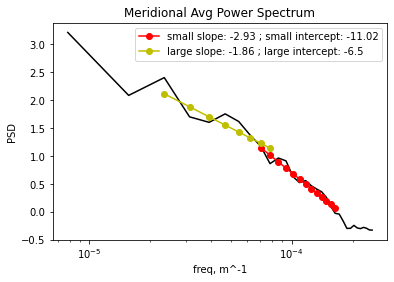

In [42]:
# plot the mean power spectrum
ax = plt.plot(freq, np.log10(merid_spectrum),'k-')

small_range = [6000, 15000]
large_range = [12000, 50000]

ww_small = np.where( ( freq>(1/small_range[1])) & (freq<(1/small_range[0])))[0]
ww_large = np.where( ( freq>(1/large_range[1])) & (freq<(1/large_range[0])))[0]

ax = plt.plot(freq[ww_small] , msmall_slope*np.log10(freq[ww_small]) + msmall_int,'ro-', 
             label = 'small slope: {} ; small intercept: {}'.format(msmall_slope, msmall_int))

ax = plt.plot(freq[ww_large] , mlarge_slope*np.log10(freq[ww_large]) + mlarge_int,'yo-', 
             label = 'large slope: {} ; large intercept: {}'.format(mlarge_slope, mlarge_int))

plt.semilogx()
plt.xlabel('freq, m^-1')
plt.ylabel('PSD')
plt.title('Meridional Avg Power Spectrum')

plt.legend()
plt.show()

# LL vs large zonal spectral slope: global

### Load table

In [7]:
os.getenv('ENDPOINT_URL')
llc_tbl = ulmo_io.load_main_table('s3://llc/Tables/LLC_modis_noise.parquet')

Read main table: s3://llc/Tables/LLC_modis_noise.parquet


### Calculate avg large spectral slope

In [8]:
slope_arr = slopes[:, 1]
slope_arr.shape

(635295,)

### Add slope column

In [9]:
slope_obj = pd.Series( data=slope_arr, index= llc_tbl.sort_values('pp_idx').index )

In [10]:
llc_tbl['zonal_slope'] = slope_obj

In [11]:
llc_tbl.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,modis_filename,UID,...,lat,lon,row,col,datetime,filename,DT,DT_p,LL,zonal_slope
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.126851,AQUA_MODIS.20120101T041007.L2.SST.nc,132537589513787314,...,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,3.096158,1.903937,128.498108,-2.43
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315916,AQUA_MODIS.20120101T041007.L2.SST.nc,132537805313721278,...,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,3.153486,2.695485,55.572327,-2.81
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.914161,AQUA_MODIS.20120101T041007.L2.SST.nc,132537968313680858,...,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,3.371701,1.077643,162.429688,-2.96
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859090,AQUA_MODIS.20120101T041007.L2.SST.nc,132538091113729767,...,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,3.330117,1.101630,168.820129,-1.85
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.130058,AQUA_MODIS.20120101T041007.L2.SST.nc,132538134313681305,...,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,1.548499,1.023432,152.972656,-2.94


### Scatter Plot

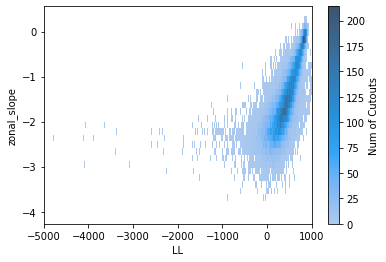

In [31]:
ax = sns.histplot( data = llc_tbl, x = 'LL', y = 'zonal_slope', bins=30, discrete=(True, False), cbar=True)

ax.set_xlim(-5000, 1000)
ax.collections[0].colorbar.set_label("Num of Cutouts")

# LL vs avg small spectral slope: global

### Calculate

In [22]:
small_slope_arr = (slopes[:, 0] + slopes[:, 2])/2
small_slope_arr.shape

(635295,)

### Add column

In [24]:
small_slope_obj = pd.Series( data=small_slope_arr, index= llc_tbl.sort_values('pp_idx').index )

In [25]:
llc_tbl['small_slope'] = small_slope_obj

### Scatter Plot

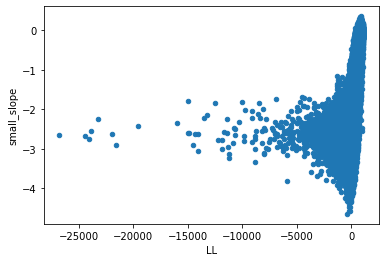

In [26]:
ax = llc_tbl.plot.scatter( x = 'LL', y = 'small_slope')